In [8]:
import os
import urllib
import functools

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp


%matplotlib inline

In [10]:
live_csv = pd.read_csv(r'C:\Users\anton\OneDrive\Desktop\Projects\Tableau work\Live.csv')
#
live_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [11]:
c_df = live_csv.iloc[:,:12].copy()
#dropping duplicates
c_df = c_df.drop_duplicates()
#data exploration
c_df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [22]:
#converting status_published to datetime, keeping all time granularity
c_df.status_published = pd.to_datetime(c_df.status_published)

In [14]:
## plotting the data/plot all engagement in a function from linkedin course
pp.figure(figsize=(12,2.5))

def p_by_year(df,metrics):
    for metric in metrics: 
        c_dfbyyear = df.groupby('status_published')[metric].sum()
        #normalizing noisy data/ noisines likely comes from missing date data
        corr = np.correlate(c_dfbyyear, np.ones(100)/100, 'same')
        pp.plot(c_dfbyyear.index, corr, label=metric)
        pp.legend()

<Figure size 864x180 with 0 Axes>

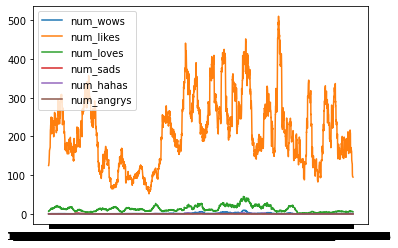

In [16]:
p_by_year(c_df,['num_wows','num_likes','num_loves','num_sads','num_hahas','num_angrys'])

In [23]:
#engagement dataframe
e_df = c_df.iloc[:,:6].copy()


#exploring engagement dataframe
metric_sums = e_df.groupby('status_type').sum()
metric_sums['t_total'] = metric_sums.sum(axis=1)

print(metric_sums)

             num_reactions  num_comments  num_shares  t_total
status_type                                                  
link                 23319           359         277    23955
photo               731372         65678       10574   807624
status              158944         13078         925   172947
video               661102       1499524      269994  2430620


<BarContainer object of 7 artists>

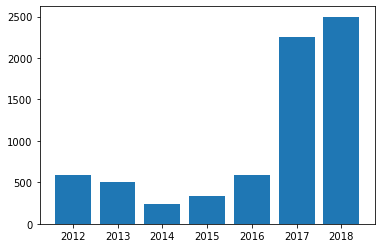

In [25]:
# need a summary of total numbers of ids per year in range

year_range= list(df_byyear.status_published.dt.year.unique())

df_yearsum = pd.DataFrame(columns=['year','annual_posts'])
df_yearsum.year = [year for year in year_range]
df_yearsum.annual_posts = [ val for val in [len(df_byyear[df_byyear.status_published.dt.year == year]) for year in year_range]]
#add bar labels
pp.bar(df_yearsum.year,df_yearsum.annual_posts)

In [26]:
##splitting dataframe further 
#reactions dataframe
r_df= c_df[['status_id','status_published','num_reactions','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']].copy()

#need to pivot last 6 cols to turn the col labels into categories with column for numbers, keep 0s, each id/timestamp will gain 6 subcategories
melt_df = pd.melt(r_df, id_vars=["status_id",'status_published'], 
                  value_vars=["num_wows",'num_likes','num_loves','num_sads','num_hahas','num_angrys','num_reactions'])